In [1582]:
# import packages
import sys
sys.path.insert(0, '../monod/src/')

import numpy as np
import pandas as pd
import pickle
import scipy
import scipy.stats as stats
from scipy.stats import pearsonr

# sc
import anndata

# colors
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib_venn import venn2, venn2_circles
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

import seaborn as sns

# import Monod
import monod
from monod import analysis

In [1583]:
# color function

def find_mid_color(color1, color2):
    rgb1 = mcolors.to_rgb(color1)
    rgb2 = mcolors.to_rgb(color2)

    mid_rgb = [(c1 + c2) / 2 for c1, c2 in zip(rgb1, rgb2)]

    mid_color = mcolors.to_hex(mid_rgb)
    return mid_color


In [1443]:
# remove all samples from day 7 
samples = ['S0',
    'S22',
    'S23',
    'S26',
#     'S1', # no T cells
    'S2',
#     'S3', # no T cells
    'S35',
    'S10',
    'S8',
    'S9',
#     'S14',
#     'S15',
#     'S17',
#     'S37', # no T cells
    'S38',
    'S40']

sample_order_label = ['S0-Day0',
    'S22-Day0',
    'S23-Day0',
    'S26-Day0',
#     'S1-Day1',
    'S2-Day1',
#     'S3-Day1',
    'S35-Day1',
    'S10-Day3',
    'S8-Day3',
    'S9-Day3',
#     'S14-Day7',
#     'S15-Day7',
#     'S17-Day7',
#     'S37-Day14',
    'S38-Day14',
    'S40-Day14']

day_list = [s.split('-')[1] for s in sample_order_label]


color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
days = [0,1,3,7,14]
day_color_dict = {f'Day{days[i]}' : col for i,col in enumerate(color_list)}

day_color_list = [day_color_dict['Day0'],
    day_color_dict['Day0'],
    day_color_dict['Day0'],
    day_color_dict['Day0'],
#    day_color_dict['Day1'],
    day_color_dict['Day1'],
#     day_color_dict['Day1'],
    day_color_dict['Day1'],
    day_color_dict['Day3'],
    day_color_dict['Day3'],
    day_color_dict['Day3'],
#     day_color_dict['Day7'],
#     day_color_dict['Day7'],
#     day_color_dict['Day7'],
#     day_color_dict['Day14'],
    day_color_dict['Day14'],
    day_color_dict['Day14']]


In [161]:
sr_dict = {}
sd_dict = {}
param_dict = {}
param_dict_all = {}

In [163]:
# load in search results and perform GoF test

for samp in samples:
    print(samp)
    sd_ = monod.analysis.load_search_data(f'./fits/mc_241031_029_lu_T_1/{samp}_T/raw.sd')
    sr_ = monod.analysis.load_search_results(f'./fits/mc_241031_029_lu_T_1/{samp}_T/Bursty_Poisson_10x11/grid_scan_results.res')
    sr_.find_sampling_optimum()
    sd_dict[samp] = sd_
    sr_dict[samp] = sr_
    
    
    # run GoF
    _=sr_.chisquare_testing(sd_)
    sr_.chisq_best_param_correction(sd_,viz=False) 
    sr_.compute_sigma(sd_,num_cores=15)
    sr_.update_on_disk()

    filt = ~sr_.rejected_genes
    print(f'{sum(filt)} genes rejected.')
    print('Technical parameter optimum ',sr_.samp_optimum )
    
    param_dict_all = pd.DataFrame({'gene_name' : sd_.gene_names,
                                     'rejected' : filt.flatten(),
                                     'log10_b' : sr_.phys_optimum[:,0],
                                     'log10_beta' : sr_.phys_optimum[:,1],
                                     'log10_gamma' : sr_.phys_optimum[:,2],
                                     'b' : 10**sr_.phys_optimum[:,0],
                                     'beta' : 10**sr_.phys_optimum[:,1],
                                     'gamma' : 10**sr_.phys_optimum[:,2]})
    
    
    param_dict[samp] = pd.DataFrame({'gene_name' : sd_.gene_names[filt],
                                     'log10_b' : sr_.phys_optimum[:,0][filt],
                                     'log10_beta' : sr_.phys_optimum[:,1][filt],
                                     'log10_gamma' : sr_.phys_optimum[:,2][filt],
                                     'b' : 10**sr_.phys_optimum[:,0][filt],
                                     'beta' : 10**sr_.phys_optimum[:,1][filt],
                                     'gamma' : 10**sr_.phys_optimum[:,2][filt]})

S0


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1782 genes rejected.
Technical parameter optimum  (-8.444444444444445, -0.6999999999999997)
S22


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


2162 genes rejected.
Technical parameter optimum  (-8.444444444444445, -1.25)
S23


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1817 genes rejected.
Technical parameter optimum  (-8.444444444444445, -0.6999999999999997)
S26


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1950 genes rejected.
Technical parameter optimum  (-8.444444444444445, -0.6999999999999997)
S2


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


941 genes rejected.
Technical parameter optimum  (-9.0, -0.6999999999999997)
S35


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1781 genes rejected.
Technical parameter optimum  (-8.444444444444445, -0.6999999999999997)
S10


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1787 genes rejected.
Technical parameter optimum  (-8.444444444444445, -0.6999999999999997)
S8


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1162 genes rejected.
Technical parameter optimum  (-9.0, -0.6999999999999997)
S9


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1692 genes rejected.
Technical parameter optimum  (-8.444444444444445, -0.6999999999999997)
S14


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


725 genes rejected.
Technical parameter optimum  (-9.0, -0.14999999999999947)
S15


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1032 genes rejected.
Technical parameter optimum  (-8.444444444444445, -0.6999999999999997)
S17


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


696 genes rejected.
Technical parameter optimum  (-9.0, -0.14999999999999947)
S38


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


1735 genes rejected.
Technical parameter optimum  (-8.444444444444445, -0.6999999999999997)
S40
2408 genes rejected.
Technical parameter optimum  (-7.888888888888889, -1.25)


/home/tara/maria/monod/reviews/../monod/src/monod/inference.py:1370: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


Distribution of technical parameters. 

In [164]:
log10_CN = []
log10_lambdaM = []
num_cells = []

for samp in samples:
    log10_CN.append( sr_dict[samp].samp_optimum[0] )
    log10_lambdaM.append( sr_dict[samp].samp_optimum[1] )
    num_cells.append(sd_dict[samp].n_cells)

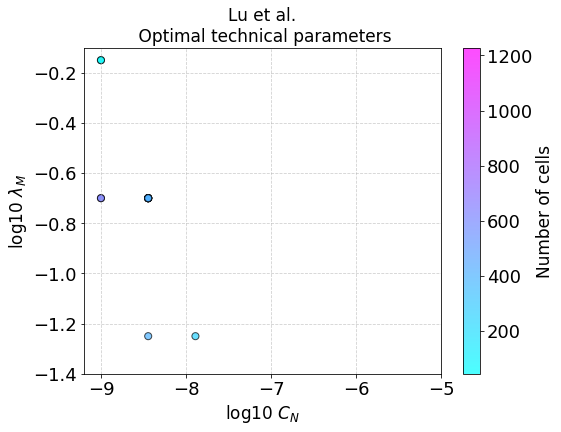

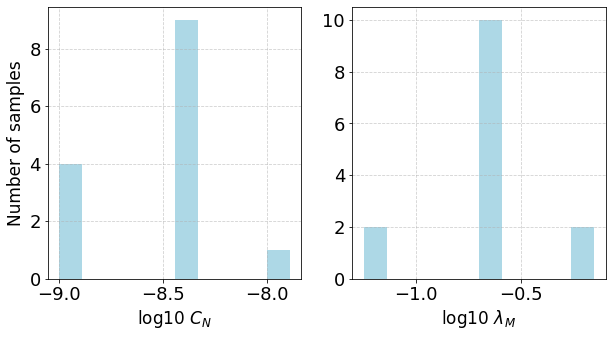

In [175]:
# create scatter plot of technical parameters
fs = 17
plt.figure(figsize=(8, 6))
scatter = plt.scatter(log10_CN , log10_lambdaM, c=num_cells, 
                      cmap='cool', s=50, edgecolor='k', alpha=0.7)

color_bar = plt.colorbar(scatter)
color_bar.set_label('Number of cells',fontsize=fs)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('log10 $C_N$', fontsize = fs)
plt.ylabel(r'log10 $\lambda_M$', fontsize = fs)

plt.xlim(-9.2,-5.0)
plt.ylim(-1.4,-.1)

plt.title('Lu et al.\n Optimal technical parameters',fontsize=fs)
plt.show();


fig,ax = plt.subplots(1,2, figsize= (10,5))
ax[0].hist(log10_CN,color='lightblue')
ax[0].set_xlabel('log10 $C_N$', fontsize = fs)
ax[0].set_ylabel('Number of samples',fontsize=fs)
ax[1].hist(log10_lambdaM,color='lightblue')
ax[1].set_xlabel(r'log10 $\lambda_M$', fontsize = fs)
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[1].grid(True, linestyle='--', alpha=0.6);


As the technical parameters are hard to infer, we will use those of the Desai dataset also analyzed for this paper. This will mean redefining the sampling optimum somewhat arbitrarily.

In [1444]:
arbitrary_v2_params = np.asarray([-6.5,-1.2])
arbitrary_v2_ind = np.argmin(((sr_dict['S0'].sp.sampl_vals-arbitrary_v2_params)**2).sum(1))

# sr_dict_std_opt = {}
# sd_dict_std_opt = {}
param_dict_std_opt = {}
param_dict_all_std_opt = {}

In [1445]:
# redefine samp optimum and parameters
for samp in samples:
    print(samp)

#     sd_ = sd_dict[samp] 
#     sr_ = sr_dict[samp]
    
#     sr_.set_sampling_optimum(arbitrary_v2_ind)
    
#     # run NEW GoF
#     _=sr_.chisquare_testing(sd_)
#     sr_.compute_sigma(sd_,num_cores=15)
    
#     sr_dict_std_opt[samp] = sr_
#     sd_dict_std_opt[samp] = sd_
    
    
    sr_ = sr_dict_std_opt[samp]
    sd_ = sd_dict_std_opt[samp]
    filt = ~sr_.rejected_genes
    print(f'{sum(filt)} genes NOT rejected.')
    print('Technical parameter optimum ',sr_.samp_optimum )
    
    param_dict_all_std_opt[samp] = pd.DataFrame({'gene_name' : sd_.gene_names,
                                     'rejected' : filt.flatten(),
                                     'log10_b' : sr_.phys_optimum[:,0],
                                     'log10_beta' : sr_.phys_optimum[:,1],
                                     'log10_gamma' : sr_.phys_optimum[:,2],
                                     'b' : 10**sr_.phys_optimum[:,0],
                                     'beta' : 10**sr_.phys_optimum[:,1],
                                     'gamma' : 10**sr_.phys_optimum[:,2]})
    
    
    param_dict_std_opt[samp] = pd.DataFrame({'gene_name' : sd_.gene_names[filt],
                                     'log10_b' : sr_.phys_optimum[:,0][filt],
                                     'log10_beta' : sr_.phys_optimum[:,1][filt],
                                     'log10_gamma' : sr_.phys_optimum[:,2][filt],
                                     'b' : 10**sr_.phys_optimum[:,0][filt],
                                     'beta' : 10**sr_.phys_optimum[:,1][filt],
                                     'gamma' : 10**sr_.phys_optimum[:,2][filt]})

S0
2398 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S22
2367 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S23
2352 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S26
2441 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S2
1659 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S35
2329 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S10
2428 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S8
2303 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S9
2345 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S38
2455 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)
S40
2424 genes NOT rejected.
Technical parameter optimum  (-6.777777777777778, -1.25)


Because S38 had the most genes pass GoF thresholds, it will be used as the baseline from which to calculate parameter offsets. 

In [1446]:
# find genes that overlap between all samples and passed GoF tests
genes_all_samples = set(param_dict_std_opt[sample_order[0]].gene_name.values)

for samp in samples[1:]:
    genes_all_samples = genes_all_samples.intersection(param_dict_std_opt[samp].gene_name.values)
    
len(genes_all_samples)

1182

Now, calculating the offset from reference sample S38. 

In [1447]:
# create numpy arrays with (N_genes,N_params) per sample
# set one sample as reference (one in which most genes passed GoF), and then calculate the offset using all genes
# that passed GoF in both that sample and the compared sample

reference_samp = 'S38'
param_dict_std_opt[reference_samp]['log10_b_corrected'] = param_dict_std_opt[reference_samp]['log10_b']
param_dict_std_opt[reference_samp]['log10_beta_corrected'] = param_dict_std_opt[reference_samp]['log10_beta']
param_dict_std_opt[reference_samp]['log10_gamma_corrected'] = param_dict_std_opt[reference_samp]['log10_gamma']
offset_dict = {'log10_b' : [], 'log10_beta' : [], 'log10_gamma' : []}


for samp in np.array(samples)[np.array(samples)!="S38"]:
    
    df_samp = param_dict_std_opt[samp]
    df_merge = param_dict_std_opt[reference_samp].merge(df_samp,on='gene_name',how='inner')
    df_offset_ = pd.DataFrame({'gene_name' : df_merge.gene_name.values})
    
    for param in ['log10_b','log10_beta','log10_gamma']:
        m1 = df_merge[param+'_x'].values
        m2 = df_merge[param+'_y'].values
        offset_ = analysis.diffexp_fpi(m1,m2,viz=False)[1]
        df_offset_[f'{param}_corrected'] = m2-offset_
        offset_dict[param].append(offset_)
        
    param_dict_std_opt[samp] = param_dict_std_opt[samp].merge(df_offset_,on='gene_name',
                                                              how='inner')



## Visualize offsets


plot offset distribution per parameter (how big are they)
plot b offset vs gamma offset and b offset vs beta offset and gamma offset vs beta offset for all samples

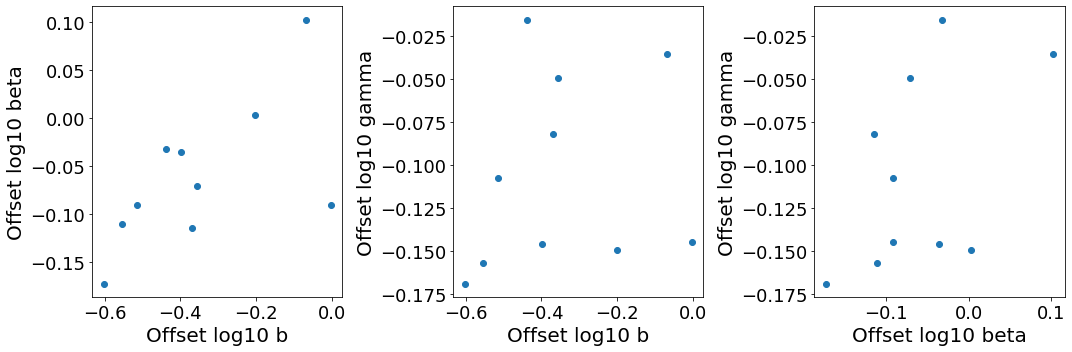

In [1448]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
fs = 20

ax[0].scatter(offset_dict['log10_b'],offset_dict['log10_beta'])
ax[0].set_xlabel('Offset log10 b',fontsize=fs)
ax[0].set_ylabel('Offset log10 beta',fontsize=fs)

ax[1].scatter(offset_dict['log10_b'],offset_dict['log10_gamma'])
ax[1].set_xlabel('Offset log10 b',fontsize=fs)
ax[1].set_ylabel('Offset log10 gamma',fontsize=fs)

ax[2].scatter(offset_dict['log10_beta'],offset_dict['log10_gamma'])
ax[2].set_xlabel('Offset log10 beta',fontsize=fs)
ax[2].set_ylabel('Offset log10 gamma',fontsize=fs)

plt.tight_layout();

In [1449]:
# add a column for sample and day in the dataframe
for i,samp in enumerate(samples):
    param_dict_std_opt[samp]['Sample'] = samp
    param_dict_std_opt[samp]['Day'] = sample_order_label[i].split('-')[1]

## Filter genes

Filter for genes that passed GoF in ALL samples AND have non-zero counts in ALL samples.

In [1450]:
# create pseudobulk sample

pseudobulk_spliced_all = np.ones((len(samples),3000))

for i,samp in enumerate(samples):
    sd_ = sd_dict[samp]
    pseudobulk_spliced_all[i,:] = sd_.layers[1].sum(axis=1)
    
    
nonzero_gene_filt = pseudobulk_spliced_all.prod(axis=0)!=0

In [1451]:
selected_genes_filter = np.array([g in genes_all_samples for g in sd_.gene_names]) & nonzero_gene_filt
selected_genes = sd_.gene_names[selected_genes_filter]

In [1459]:
df_plot = param_dict_std_opt['S0']
df_plot = df_plot[df_plot.gene_name.isin(selected_genes)]

for samp in samples[1:]:
    
    df_ = param_dict_std_opt[samp]
    df_ = df_[df_.gene_name.isin(selected_genes)]
    df_ = df_[df_plot.columns]
    df_ = df_.reset_index(drop=True)  # Ensures unique indices in df_

    # Concatenate instead of append
    df_plot = pd.concat([df_plot, df_], ignore_index=True)

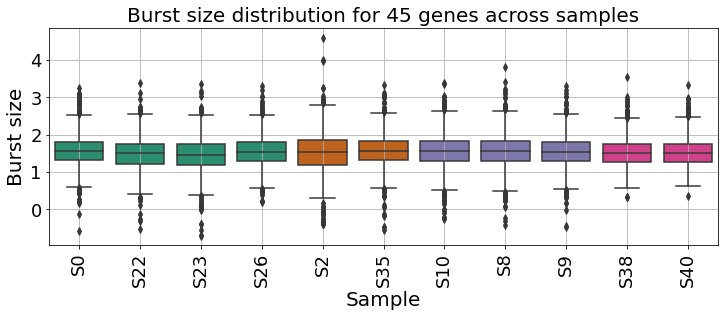

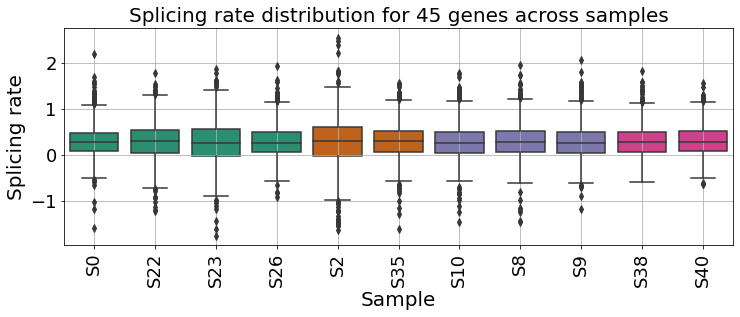

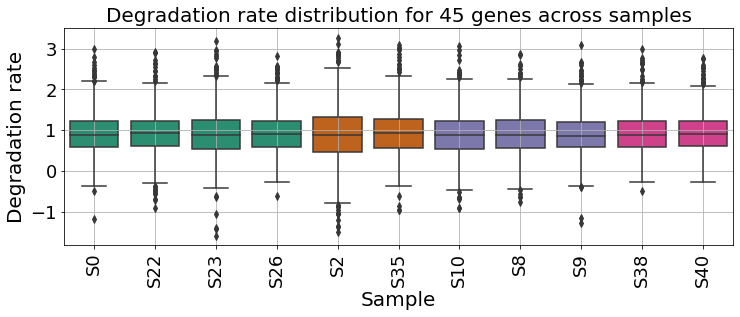

In [1460]:
fig,ax = plt.subplots(figsize=(12,4))
sns.boxplot(data=df_plot,
            x='Sample',
            y='log10_b_corrected',
            palette=day_color_list)
#             hue='Day')
plt.ylabel('Burst size',fontsize=20)
plt.xlabel('Sample',fontsize=20)
plt.title('Burst size distribution for 45 genes across samples',fontsize=20)
plt.grid()
plt.xticks(rotation=90)
plt.show();

fig,ax = plt.subplots(figsize=(12,4))
sns.boxplot(data=df_plot,
            x='Sample',
            y='log10_beta_corrected',
            palette=day_color_list)
#             hue='Day')
plt.ylabel('Splicing rate',fontsize=20)
plt.xlabel('Sample',fontsize=20)
plt.title('Splicing rate distribution for 45 genes across samples',fontsize=20)
plt.grid()
plt.xticks(rotation=90)
plt.show();

fig,ax = plt.subplots(figsize=(12,4))
sns.boxplot(data=df_plot,
            x='Sample',
            y='log10_gamma_corrected',
            palette=day_color_list)
#             hue='Day')
plt.ylabel('Degradation rate',fontsize=20)
plt.xlabel('Sample',fontsize=20)
plt.title('Degradation rate distribution for 45 genes across samples',fontsize=20)
plt.grid()
plt.xticks(rotation=90)
plt.show();

# Correct mean spliced counts as in DESeq2

To compare offset parameters and spliced means, pseudobulked samples will be corrected as in DESeq2.


That is:

1. Take geometric mean of genes across samples to create "reference sample."
2. Divide each sample by the "reference sample" to get sample gene ratios. 
3. Take the median of the sample gene ratios as the "size factor" for each sample. 
4. Divide every gene count in a given sample by that sample's size factor. 



In [1461]:
filt_for_pseudobulk = np.array([True if g in selected_genes else False for g in sd_.gene_names])
sum(filt_for_pseudobulk)*len(samples)

13002

In [1462]:
pseudobulk_spliced = np.ones((len(samples),sum(filt_for_pseudobulk)))

for i,samp in enumerate(samples):
    sd_ = sd_dict[samp]
    pseudobulk_spliced[i,:] = sd_.layers[1].sum(axis=1)[filt_for_pseudobulk]


# calculate reference sample
ref_samp = np.prod(pseudobulk_spliced,axis=0)**(1/len(samples))
# divide samples by reference sample
pseudobulk_ratios = pseudobulk_spliced/ref_samp
# find median of reference sample
size_factors = np.array([np.median(pseudobulk_ratios[i][np.isfinite(pseudobulk_ratios[i])]) for i in range(len(samples))])
# divide pseudobulk by size factors
pseudobulk_spliced_norm = pseudobulk_spliced.T/size_factors
pseudobulk_spliced_norm = pseudobulk_spliced_norm.T

In [1463]:
df_plot['pseudobulk_spliced_norm'] = pseudobulk_spliced_norm.flatten()
df_plot['log10_pseudobulk_spliced_norm'] = np.log10(pseudobulk_spliced_norm.flatten()+0.01)

In [1464]:
df_plot['Day_numeric'] = df_plot['Day'].str.split('y').str[1]

# DE of parameters from Day 0


In [1695]:
def get_overlap_day_df(param_df_dict,
                       samples,
                       genes_overlap=[],
                       ):
    
    
    # if genes are not provided, find genes that overlap between all samples and passed GoF tests
    if len(genes_overlap)==0:
        genes_overlap = set(param_df_dict[samples[0]].gene_name.values)

        for samp in samples[1:]:
            genes_overlap = genes_overlap.intersection(param_df_dict[samp].gene_name.values)

    
    # normalized unspliced means
    pseudobulk_spliced = np.ones((len(samples),len(genes_overlap)))
    
    for i,samp in enumerate(samples):
        sd_ = sd_dict[samp]
        gene_overlap_filt = [s in genes_overlap for s in sd_.gene_names]
        pseudobulk_spliced[i,:] = sd_.layers[1].sum(axis=1)[gene_overlap_filt]

    # calculate reference sample
    ref_samp = np.prod(pseudobulk_spliced,axis=0)**(1/len(samples))
    # divide samples by reference sample
    pseudobulk_ratios = pseudobulk_spliced/ref_samp
    # find median of reference sample
    size_factors = np.array([np.median(pseudobulk_ratios[i][np.isfinite(pseudobulk_ratios[i])]) for i in range(len(samples))])
    # divide pseudobulk by size factors
    pseudobulk_spliced_norm = pseudobulk_spliced.T/size_factors
    pseudobulk_spliced_norm = pseudobulk_spliced_norm.T
    
    # create overlap df
    df_overlap = param_df_dict[samples[0]]
    df_overlap = df_overlap[df_overlap.gene_name.isin(genes_overlap)]
    df_overlap['pseudobulk_spliced_norm'] = pseudobulk_spliced_norm[i]
    df_overlap['log10_pseudobulk_spliced_norm'] = np.log10(pseudobulk_spliced_norm[i])
    
    
    for i,samp in enumerate(samples[1:]):

        df_ = param_df_dict[samp]
        df_ = df_[df_.gene_name.isin(genes_overlap)]
        df_['pseudobulk_spliced_norm'] = pseudobulk_spliced_norm[i+1]
        df_['log10_pseudobulk_spliced_norm'] = np.log10(pseudobulk_spliced_norm[i+1])
        df_ = df_[df_overlap.columns]
        df_ = df_.reset_index(drop=True)  # Ensures unique indices in df_

        # Concatenate instead of append
        df_overlap = pd.concat([df_overlap, df_], ignore_index=True)
        
    return df_overlap

def perform_ttest(df_overlap,Day1,Day2,parameters):
    
    
    dict_return = {}
    
    samps1 = df_overlap[df_overlap.Day == Day1].Sample.unique()
    samps2 = df_overlap[df_overlap.Day == Day2].Sample.unique()
    
    genes = df_overlap.gene_name.unique()
    
    for p in parameters:
        vals1 = np.ones((len(samps1),len(genes)))
        vals2 = np.ones((len(samps2),len(genes)))

        for i,samp in enumerate(samps1):
            vals1[i,:] = df_overlap[df_overlap.Sample==samp][p].values

        for i,samp in enumerate(samps2):
            vals2[i,:] = df_overlap[df_overlap.Sample==samp][p].values

        # t test 
        result = scipy.stats.ttest_ind(vals1,vals2,equal_var=False)
        if 'log10' in param:
            FC = 10**(vals2).mean(axis=0) / 10**(vals1).mean(axis=0)
        else:
            FC = vals2.mean(axis=0) / vals1.mean(axis=0)
        
        num_test = len(FC)
        sorted_index = np.argsort(np.argsort(result.pvalue))
        fdr = (np.arange(1,num_test+1)/num_test * sorted(result.pvalue))[sorted_index]

        dict_return[p] = (FC,result.statistic,result.pvalue,fdr)
        
        dict_return['gene_name'] = df_overlap[df_overlap.Sample==samp].gene_name.values
    
    return(dict_return)
    
    
    

**Day 0 vs Day 1**

In [1696]:
parameters = ['log10_b_corrected','log10_beta_corrected','log10_gamma_corrected',
              'pseudobulk_spliced_norm','log10_pseudobulk_spliced_norm' ]
genes_overlap = df_plot.gene_name.unique()

In [1697]:
samples_day0 = np.array(samples)[np.array(day_list) == 'Day0']
samples_day1 = np.array(samples)[np.array(day_list) == 'Day1']
df_day0_day1 = get_overlap_day_df(param_dict_std_opt,
                                  samples = np.concatenate((samples_day0,samples_day1)),
                                  genes_overlap=genes_overlap
                                 )


d0_d1_ttest = perform_ttest(df_day0_day1,
                            Day1='Day0',
                            Day2='Day1',
                            parameters = parameters,
                           )

<ipython-input-1695-2c1048c7825e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overlap['pseudobulk_spliced_norm'] = pseudobulk_spliced_norm[i]
<ipython-input-1695-2c1048c7825e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overlap['log10_pseudobulk_spliced_norm'] = np.log10(pseudobulk_spliced_norm[i])
<ipython-input-1695-2c1048c7825e>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [1698]:
for p in parameters: 
    print(p)
    print(sum(d0_d1_ttest[p][3]<0.05), len(d0_d1_ttest[p][3]) )

log10_b_corrected
313 1182
log10_beta_corrected
288 1182
log10_gamma_corrected
299 1182
pseudobulk_spliced_norm
288 1182
log10_pseudobulk_spliced_norm
284 1182


**Day 0 vs Day 3**

In [1699]:
samples_day3 = np.array(samples)[np.array(day_list) == 'Day3']
df_day0_day3 = get_overlap_day_df(param_dict_std_opt,
                                  samples = np.concatenate((samples_day0,samples_day3)),
                                  genes_overlap=genes_overlap
                                 )


d0_d3_ttest = perform_ttest(df_day0_day3,
                            Day1='Day0',
                            Day2='Day3',
                            parameters = parameters)

<ipython-input-1695-2c1048c7825e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overlap['pseudobulk_spliced_norm'] = pseudobulk_spliced_norm[i]
<ipython-input-1695-2c1048c7825e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overlap['log10_pseudobulk_spliced_norm'] = np.log10(pseudobulk_spliced_norm[i])
<ipython-input-1695-2c1048c7825e>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [1700]:
for p in parameters: 
    print(p)
    print(sum(d0_d3_ttest[p][3]< 0.05), len(d0_d3_ttest[p][3]) )

log10_b_corrected
369 1182
log10_beta_corrected
335 1182
log10_gamma_corrected
342 1182
pseudobulk_spliced_norm
386 1182
log10_pseudobulk_spliced_norm
386 1182


**Day 0 vs Day 14**

In [1701]:
samples_day0 = np.array(samples)[np.array(day_list) == 'Day0']
samples_day14 = np.array(samples)[np.array(day_list) == 'Day14']
df_day0_day14 = get_overlap_day_df(param_dict_std_opt,
                                  samples = np.concatenate((samples_day0,samples_day14)),
                                   genes_overlap=genes_overlap
                                 )


d0_d14_ttest = perform_ttest(df_day0_day14,
                            Day1='Day0',
                            Day2='Day14',
                            parameters = parameters)

<ipython-input-1695-2c1048c7825e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overlap['pseudobulk_spliced_norm'] = pseudobulk_spliced_norm[i]
<ipython-input-1695-2c1048c7825e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overlap['log10_pseudobulk_spliced_norm'] = np.log10(pseudobulk_spliced_norm[i])
<ipython-input-1695-2c1048c7825e>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [1702]:
for p in parameters: 
    print(p)
    print(sum(d0_d14_ttest[p][3]<0.05), len(d0_d14_ttest[p][3]) )

log10_b_corrected
243 1182
log10_beta_corrected
266 1182
log10_gamma_corrected
275 1182
pseudobulk_spliced_norm
259 1182
log10_pseudobulk_spliced_norm
261 1182


In [1703]:
# plt.scatter(d0_d14_ttest['log10_pseudobulk_spliced_norm'][3],
#             d0_d14_ttest['pseudobulk_spliced_norm'][3],
#            color='gray',alpha=0.7)
# plt.xlabel('FDR log10 norm means',fontsize=20)
# plt.ylabel('FDR norm means',fontsize=20)
# plt.xscale('log')
# plt.yscale('log')
# plt.axvline(0.05,linestyle='--')
# plt.axhline(0.05,linestyle='--',label='0.05')
# plt.legend()

Group for plotting.

In [1704]:
days = ['Day1','Day3','Day14']


day_ttest_results = [d0_d1_ttest,d0_d3_ttest,d0_d14_ttest]
day_list_all = []
param_list = []
gene_list = []
FC_list = []
EF_list = []
pval_list = []
fdr_list = []
log2FC_list = []


for i,ttest_result in enumerate(day_ttest_results):
    
    for p in parameters:
        day_list_all += [days[i]]*len(ttest_result[p][0])
        param_list += [p]*len(ttest_result[p][0])
        gene_list += list(ttest_result['gene_name'])
        FC_list += list(ttest_result[p][0])
        log2FC_list += list(np.log2 ( ttest_result[p][0]) ) 
        EF_list += list(ttest_result[p][1])
        pval_list += list(ttest_result[p][2])
        fdr_list += list(ttest_result[p][3])
        
        
df_DE_day = pd.DataFrame({'Day' : day_list_all,
                          'Parameter' : param_list,
                          'gene_name' : gene_list,
                          'FC' : FC_list,
                          'log2FC' : log2FC_list,
                          'Effect_size' :EF_list,
                          'Abs_EF' : np.abs(np.array(EF_list)),
                          'Abs_FC' : np.abs( np.array(FC_list) ),
                          'pval' : pval_list,
                          'FDR' : fdr_list,
                          '-log10pval' : -np.log10(np.array(pval_list)),
                          '-log10FDR' : -np.log10(np.array(fdr_list))})

<ipython-input-1704-8a4a280fd15c>:22: RuntimeWarning: divide by zero encountered in log2
  log2FC_list += list(np.log2 ( ttest_result[p][0]) )


In [1705]:
df_DE_day_sig = df_DE_day[df_DE_day.FDR<=0.05]

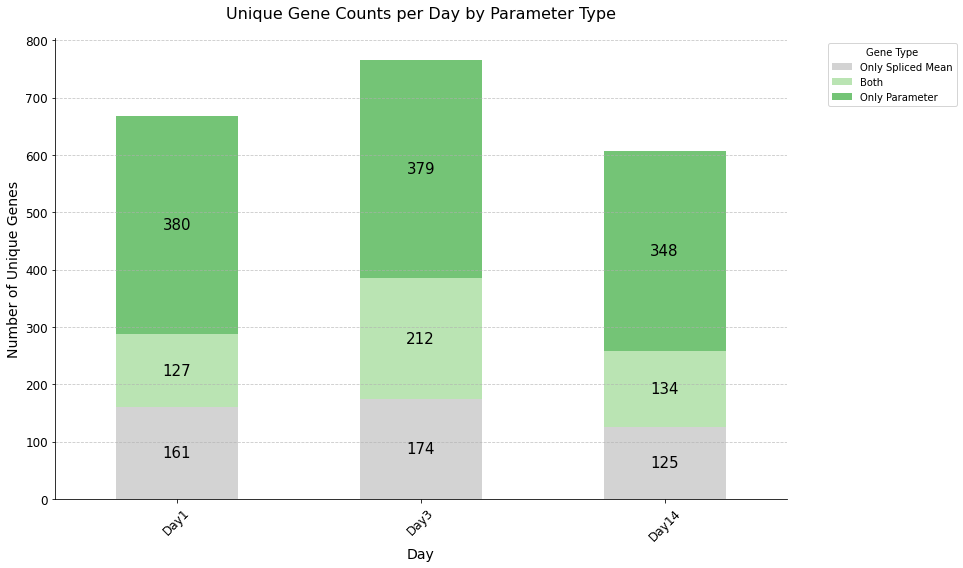

In [1691]:
categories = []

for day, group in df_DE_day_sig.groupby('Day'):
    # Unique gene names for 'pseudobulk_spliced_mean' only
    spliced_mean_genes = set(group.loc[group['Parameter'] == 'pseudobulk_spliced_norm', 'gene_name'])
    # Unique gene names for all other Parameters
    other_genes = set(group.loc[group['Parameter'].isin(['log10_b_corrected','log10_beta_corrected','log10_gamma_corrected']), 'gene_name'])
    # Intersections and exclusive sets
    only_spliced_mean = spliced_mean_genes - other_genes
    only_parameter = other_genes - spliced_mean_genes
    both = spliced_mean_genes & other_genes
    
    # Append counts for each category
    categories.append({
        'Day': day,
        'Both': len(both),
        'Only_Spliced_Mean': len(only_spliced_mean),
        'Only_Parameter': len(only_parameter)
    })

# Convert to DataFrame
count_df = pd.DataFrame(categories)

# Step 2: Plotting
count_df['Day'] = pd.Categorical(count_df['Day'], ordered=True)
count_df.set_index('Day', inplace=True)

# Define custom colors
colors = ['lightgray', '#bae4b3', '#74c476'] 
fig, ax = plt.subplots(figsize=(16, 8))
count_df = count_df.loc[ ['Day1','Day3','Day14'] ]
count_df[['Only_Spliced_Mean', 'Both', 'Only_Parameter']].plot(kind='bar', stacked=True, color=colors, ax=ax)

# Enhance aesthetics
ax.set_xlabel('Day', fontsize=14)
ax.set_ylabel('Number of Unique Genes', fontsize=14)
ax.set_title('Unique Gene Counts per Day by Parameter Type', fontsize=16, pad=20)

# Move legend outside the plot
ax.legend(['Only Spliced Mean', 'Both', 'Only Parameter'], title='Gene Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Add counts on the left of each section in the bars
i = 0 
for idx, row in count_df.iterrows():
    cumulative_height = 0
    for category, color in zip(['Only_Spliced_Mean','Both', 'Only_Parameter'], colors):
        count = row[category]
        if count > 0:
            ax.text(i, cumulative_height + count / 2, str(count), ha='center', va='center', fontsize=15, color='black')
        cumulative_height += count
    i+=1

# Customize ticks and grid
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit legend

plt.show()



In [1712]:
palette = {'pseudobulk_spliced_norm':'gray',
            'log10_pseudobulk_spliced_norm':'gray',
            'log10_b_corrected':'#f9e79f',
            'log10_beta_corrected':'teal',
            'log10_gamma_corrected':'salmon',
            'k_FC':'#c39bd3'}

<>:11: DeprecationWarning: invalid escape sequence \g
<>:68: DeprecationWarning: invalid escape sequence \m
<>:72: DeprecationWarning: invalid escape sequence \m
<>:11: DeprecationWarning: invalid escape sequence \g
<>:68: DeprecationWarning: invalid escape sequence \m
<>:72: DeprecationWarning: invalid escape sequence \m
<ipython-input-2040-61adca3987e6>:11: DeprecationWarning: invalid escape sequence \g
  param_names = ['$b$','$\\beta$','$\gamma$']
<ipython-input-2040-61adca3987e6>:68: DeprecationWarning: invalid escape sequence \m
  ax.set_xlabel('$\mu_M$', fontsize=30)
<ipython-input-2040-61adca3987e6>:72: DeprecationWarning: invalid escape sequence \m
  ax.set_ylabel('$\mu_M$', fontsize=30)


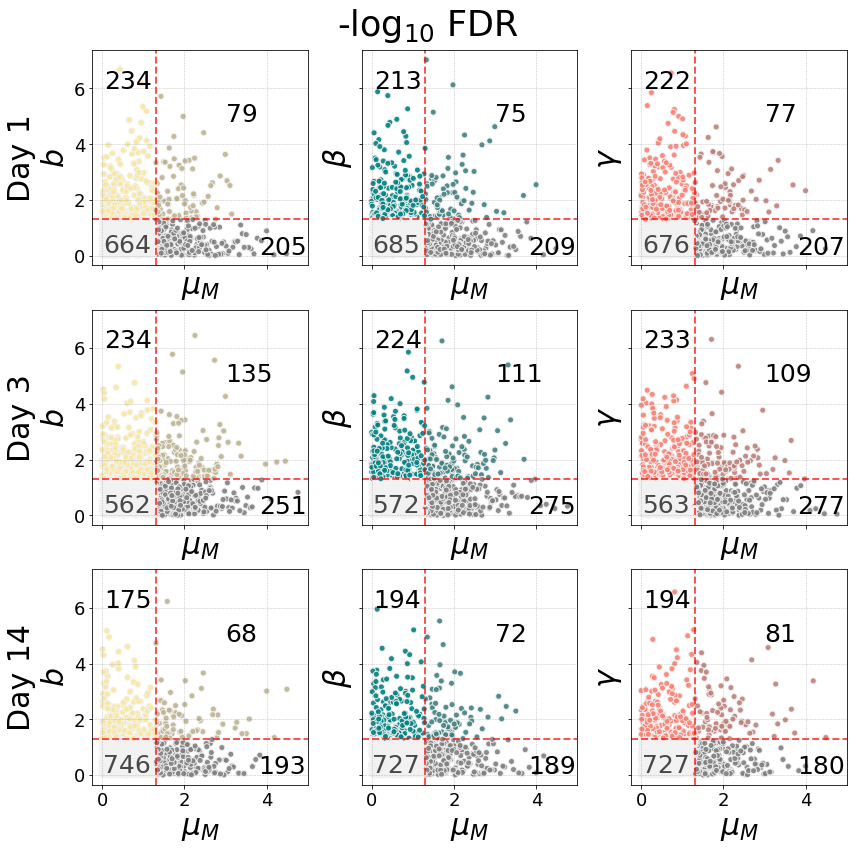

In [2040]:
# Define parameters
thresh = 0.05
log10_thresh = -np.log10(thresh)
alpha = 0.9

# Define colors
c_mean = palette['pseudobulk_spliced_norm']
c_gray = '#f1f1f1'
edgecolor = '#f3f3f3'

param_names = ['$b$','$\\beta$','$\gamma$']

# Create figure and axes
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
days = ["Day1", "Day3", "Day14"]
parameters = ["log10_b_corrected", "log10_beta_corrected", "log10_gamma_corrected"]

# Loop through rows (days) and columns (parameters)
for i, day in enumerate(days):
    for j, param in enumerate(parameters):
        c_param = palette[param]
        c_both = find_mid_color(c_param,c_mean)
        ax = axes[i, j]

        # Subset data for the current day
        day_data = df_DE_day[df_DE_day["Day"] == day]

        # Extract x and y data
        x = day_data[day_data["Parameter"] == "log10_pseudobulk_spliced_norm"]["-log10FDR"]
        y = day_data[day_data["Parameter"] == param]["-log10FDR"]
        min_,max_ = np.min(np.concatenate((x,y))),np.max(np.concatenate((x,y)))

        # Assign colors based on thresholds
        colors = []
        for xi, yi in zip(x, y):
            if xi < log10_thresh and yi < log10_thresh:
                colors.append(c_gray)
            elif xi >= log10_thresh and yi >= log10_thresh:
                colors.append(c_both)
            elif xi < log10_thresh and yi >= log10_thresh:
                colors.append(c_param)
            elif xi >= log10_thresh and yi < log10_thresh:
                colors.append(c_mean)

        # Plot the data
        ax.scatter(x, y, c=colors, edgecolor=edgecolor, alpha=alpha)

        # Add threshold lines
        ax.axhline(log10_thresh, color="red", linestyle="--", linewidth=1.9,alpha=0.7)
        ax.axvline(log10_thresh, color="red", linestyle="--", linewidth=1.9,alpha=0.7,label='FDR = 0.05')
#         ax.plot([min_,max_],[min_,max_],color="black", linestyle="--", linewidth=1.9,alpha=0.7)

        # Add counts to each region
        counts = {
            "gray": sum(c == c_gray for c in colors),
            "both": sum(c == c_both for c in colors),
            "mean": sum(c == c_mean for c in colors),
            "param": sum(c == c_param for c in colors),
        }
        
        ax.text(0.02, 0.1, f"{counts['gray']}",fontsize=25, color='black',alpha=0.7)
        ax.text(0.05, 6, f"{counts['param']}",fontsize=25, color='black')
        ax.text(3, 4.8, f"{counts['both']}",fontsize=25, color='black')
        ax.text(3.8, 0.05, f"{counts['mean']}",fontsize=25, color='black')

        # Add faint grid
        ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)
        ax.set_xlabel('$\mu_M$', fontsize=30)

        # Label columns with parameter names in the first row
        if i == 2:
            ax.set_ylabel('$\mu_M$', fontsize=30)

        # Label rows with day names in the first column
        if j == 0:
            ax.set_ylabel('Day '+day.split('y')[1]+'\n'+param_names[j], fontsize=30)
        elif j != 0:
            ax.set_ylabel(param_names[j], fontsize=30)
            

            
# axes[0,0].legend(fontsize=15)


# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)
fig.suptitle("-log$_{10}$ FDR", fontsize=35)
plt.show()


In [1577]:
df_DE_day["Day_sep"] = df_DE_day.Day.str[:3] + " " + df_DE_day.Day.str.split("y").str[1]

# Identify DE genes

In [1654]:
immune_genes = ['IL21R','IFNGR1','IFNAR2','CBLB','PTPRC','ELF4']
cell_mot_ad_genes = ['ITFG1','TMEM131','ITGAV','NEDD9','RDX','ITGA1']
apop_genes = ['RB1CC1','RAF1','BCL2L1','BCL11B','DIAPH1']
dna_repair_genes = ['ATM','RAD21']
rad_toxicity = ['TGFB1']

genes_to_test = immune_genes+cell_mot_ad_genes+apop_genes+dna_repair_genes+rad_toxicity

In [1866]:
# burst size increase and mean increase on on Day 1
day_ = 'Day1'
filt1 = (df_DE_day.Day==day_)&(df_DE_day.FDR<=0.05) # significant on selected day
filt2 = (df_DE_day['Parameter']=='log10_b_corrected')&(df_DE_day['log2FC']>0) # increase in b
filt3 = (df_DE_day['Parameter']=='log10_pseudobulk_spliced_norm')&(df_DE_day['log2FC']>0) # increase in mean


genes_param = df_DE_day[filt1&filt2].gene_name.values
genes_mean = df_DE_day[filt1&filt3].gene_name.values


for g in set(genes_param).intersection(set(genes_mean)):
    print(g)

SWAP70
RASGRP1
MDM2
RABEP1
SNX18
ITIH5
ARID1A
ITGAE
PTPRC
ATL3
ELMO1
SUCO
CLASP2
ATAD2
UIMC1
TPP2
IFRD1
CSNK1G1
AGFG1
TBC1D2B
STK39
DENND4A
PRRC2C
NEDD9
PRRC2B
EXOC4
FCHO2
MTA3
NCAPD3
GSAP
NT5E
PPP2R5E
ATRX
LNPEP
SUN2
TRERF1
TCF12
ITPR2
AQR
WNK1
MPP7
CBL
IGF2R


In [1869]:
# burst size increase and gamma decrease on on Day 1
day_ = 'Day1'
filt1 = (df_DE_day.Day==day_)&(df_DE_day.FDR<=0.05) # significant on selected day
filt2 = (df_DE_day['Parameter']=='log10_gamma_corrected')&(df_DE_day['log2FC']<0) # increase in b
filt3 = (df_DE_day['Parameter']=='log10_pseudobulk_spliced_norm')&(df_DE_day['log2FC']>0) # increase in mean


genes_param = df_DE_day[filt1&filt2].gene_name.values
genes_mean = df_DE_day[filt1&filt3].gene_name.values


for g in set(genes_param).intersection(set(genes_mean)):
    print(g)

ETS1
DIP2B
PAK2
ESYT2
MSL2
OSGIN1
CDR2
PDCD6IP
RELCH
GALNT1
PVT1
GIT2
SIPA1L1
WDR26
WLS
HERC1
INO80D
SLK
MXI1
LPIN2
R3HDM2


In [1870]:

genes_day1_b_mu_increase = ['NT5E', 'CBL','ITGAE','RASGRP1','PTPRC']
genes_day1_gamma_decrease_mu_increase = ['ETS1', 'PAK2', 'MXI1','WLS']


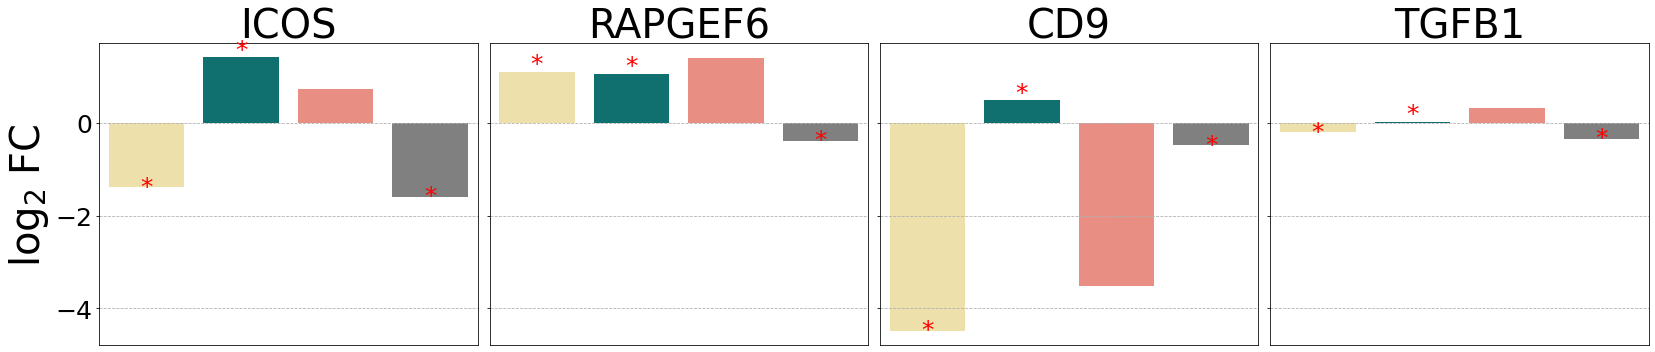

In [1984]:
# plot the Day 1 changes
# List of genes to plot
genes = ['ICOS', 'RAPGEF6', 'CD9', 'TGFB1']

# Create a single figure with a row of subplots
fig, axes = plt.subplots(1, len(genes), figsize=(27, 5), sharey=True)

for i, gene in enumerate(genes):
    ax = axes[i]
    
    # Filter data for the current gene
    df_gene_filtered = df_DE_day[(df_DE_day['gene_name'] == gene)&~(df_DE_day.Parameter=='pseudobulk_spliced_norm')\
                                &(df_DE_day['Day']=='Day1')]
    
    # Create the barplot
    sns.barplot(
        data=df_gene_filtered,
        x='Parameter', 
        y='log2FC', 
#         hue='Parameter', 
        palette=palette, 
        ax=ax
    )
    
    # Add asterisk for FDR < 0.05
    for p_index,p in enumerate(ax.patches):  # Iterate through bars
        x_val = p.get_x() + p.get_width() / 2  # Center of the bar
        y_val = p.get_height()  # Height of the bar (log2FC)
        if fdr_values[p_index]<=0.05:
#             print(p_index,gene,days_[p_index],params_[p_index],fdr_values[p_index])
            if y_val<0:
                y_val-=0.15
            ax.text(
                    x_val,  
                    y_val-0.1, 
                    f"*",  # Asterisk
                    ha='center', va='bottom', fontsize=25, color='red'
                )
    
    
    # Add subplot-specific elements
    ax.set_title(gene, fontsize=40)
    if i == 0:  # Add y-axis label to the first plot
        ax.set_ylabel('log$_2$ FC', fontsize=40)
    else:
        ax.set_ylabel('')
        
    ax.set_xlabel('')
    
    # Customize grid and ticks
    ax.grid(axis='y', linestyle='--', alpha=1.0)  # Faint y-axis grid
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', labelsize=25)
#     ax.get_legend().remove()

# axes[1].set_xlabel('Day post radiation', fontsize=40)
    
# Adjust legend placement
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', fontsize=12, title='Parameter')

# Tighten layout and adjust spacing
plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.show()

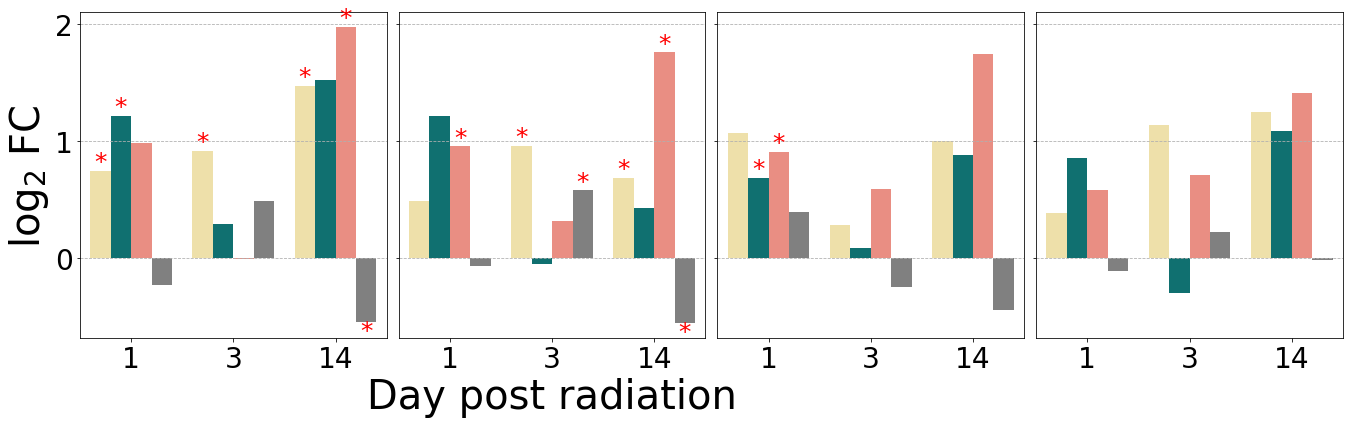

In [2033]:

# List of genes to plot

# Create a single figure with a row of subplots
fig, axes = plt.subplots(1, len(genes), figsize=(22, 6), sharey=True)

for i, gene in enumerate(genes_close_znf3):
    ax = axes[i]
    
    # Filter data for the current gene
    df_gene_filtered = df_DE_day[(df_DE_day['gene_name'] == gene)&~(df_DE_day.Parameter=='pseudobulk_spliced_norm')]
    fdr_values = df_gene_filtered.FDR.values[np.array([0,4,8,1,5,9,2,6,10,3,7,11])]
    params_ = df_gene_filtered.Parameter.values[np.array([0,4,8,1,5,9,2,6,10,3,7,11])]
    days_ = df_gene_filtered.Day_numeric.values[np.array([0,4,8,1,5,9,2,6,10,3,7,11])]
    
    # Create the barplot
    sns.barplot(
        data=df_gene_filtered,
        x='Day_numeric', 
        y='log2FC', 
        hue='Parameter', 
        palette=palette, 
        ax=ax
    )
    
    # Add asterisk for FDR < 0.05
    for p_index,p in enumerate(ax.patches):  # Iterate through bars
        x_val = p.get_x() + p.get_width() / 2  # Center of the bar
        y_val = p.get_height()  # Height of the bar (log2FC)
        if fdr_values[p_index]<=0.05:
#             print(p_index,gene,days_[p_index],params_[p_index],fdr_values[p_index])
            if y_val<0:
                y_val-=0.15
            ax.text(
                    x_val,  
                    y_val-.03, 
                    f"*",  # Asterisk
                    ha='center', va='bottom', fontsize=25, color='red'
                )
    
    
    # Add subplot-specific elements
#     ax.set_title(gene, fontsize=40)
    if i == 0:  # Add y-axis label to the first plot
        ax.set_ylabel('log$_2$ FC', fontsize=40)
    else:
        ax.set_ylabel('')
        
    ax.set_xlabel('')
    
    # Customize grid and ticks
    ax.grid(axis='y', linestyle='--', alpha=1.0)  # Faint y-axis grid
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    ax.get_legend().remove()

axes[1].set_xlabel('Day post radiation', fontsize=40)
    
# Adjust legend placement
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', fontsize=12, title='Parameter')

# Tighten layout and adjust spacing
plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.show()


# Novel target discovery
Identify genes that behave similarly to key tumor suppressant genes.

In [2019]:
parameters = ['log10_b_corrected',
 'log10_beta_corrected',
 'log10_gamma_corrected',
 'log10_pseudobulk_spliced_norm']

In [2023]:
target_gene = 'TGFB1'
target_params = df_DE_day[(df_DE_day.gene_name==target_gene)&\
                          df_DE_day.Parameter.isin(parameters)].FC.values


all_genes = df_DE_day.gene_name.unique()
param_FC_distances = np.zeros(len(all_genes))
all_genes = df_DE_day.gene_name.unique()

for g,gene_ in enumerate(all_genes):
    gene_params_ = df_DE_day[(df_DE_day.gene_name==gene_)&\
                          df_DE_day.Parameter.isin(parameters)].FC.values
    param_FC_distances[g] = np.mean( (gene_params_-target_params)**2 )
 
gene_close_thresh = np.sort(param_FC_distances)[3]
genes_close = all_genes[param_FC_distances<=gene_close_thresh]
genes_close

array(['LCP1', 'BBX', 'ARHGAP15', 'TGFB1'], dtype=object)

In [2024]:
genes_close_tgfb1 = [ 'TGFB1','LCP1', 'BBX', 'ARHGAP15']

In [2021]:
target_gene = 'ZNRF3'
target_params = df_DE_day[(df_DE_day.gene_name==target_gene)&\
                          df_DE_day.Parameter.isin(parameters)].FC.values


all_genes = df_DE_day.gene_name.unique()
param_FC_distances = np.zeros(len(all_genes))
all_genes = df_DE_day.gene_name.unique()

for g,gene_ in enumerate(all_genes):
    gene_params_ = df_DE_day[(df_DE_day.gene_name==gene_)&\
                          df_DE_day.Parameter.isin(parameters)].FC.values
    param_FC_distances[g] = np.mean( (gene_params_-target_params)**2 )
 
gene_close_thresh = np.sort(param_FC_distances)[3]
genes_close = all_genes[param_FC_distances<=gene_close_thresh]
genes_close_znf3 = genes_close

<>:24: DeprecationWarning: invalid escape sequence \m
<>:24: DeprecationWarning: invalid escape sequence \m
<ipython-input-1640-59c1101e6713>:24: DeprecationWarning: invalid escape sequence \m
  set_labels=["$\mu_M$", "Parameters"],


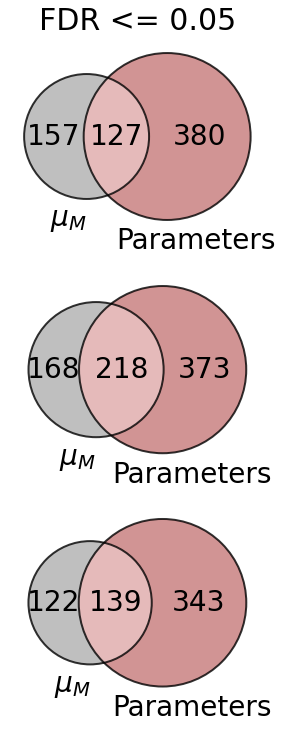

In [1640]:
# Define the days and FDR thresholds
days = ["Day1", "Day3", "Day14"]
fdr_thresholds = [0.05]

# Set up the subplot grid (4 rows, 2 columns)
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

for row, day_ in enumerate(days):  # Iterate over rows (days)
    for col, fdr_thresh in enumerate(fdr_thresholds):  # Iterate over columns (FDR thresholds)
        # Filter data for the specific day and FDR threshold
        group = df_DE_day[(df_DE_day.Day == day_) & (df_DE_day.FDR <= fdr_thresh)]
        spliced_mean_genes = set(group.loc[group['Parameter'] == 'log10_pseudobulk_spliced_norm', 'gene_name'])
        other_genes = set(group.loc[group['Parameter'].isin(['log10_b_corrected','log10_beta_corrected','log10_gamma_corrected']),
                                    'gene_name'])

        # Calculate sets for the Venn diagram
        only_spliced_mean = spliced_mean_genes - other_genes
        only_parameter = other_genes - spliced_mean_genes
        both = spliced_mean_genes & other_genes

        # Create Venn diagram
        venn = venn2(
            [len(only_spliced_mean), len(only_parameter), len(both)],
            set_labels=["$\mu_M$", "Parameters"],
            set_colors=[palette["pseudobulk_spliced_norm"], 'brown'],
            ax=ax[row],
            alpha=0.5
        )
        venn2_circles(
            [len(only_spliced_mean), len(only_parameter), len(both)],
            alpha=0.8,
            ax=ax[row]
        )

        # Customize the labels
        for t, text in enumerate(venn.set_labels):
            if text:
                if t == 1:
                    x, y = text.get_position()
                    text.set_position((x - 0.3, y))
                text.set_fontsize(28)

        for text in venn.subset_labels:
            if text:
                text.set_fontsize(28)

        # Add subplot titles for days
        if col == 0:
            ax[row].set_ylabel(day_, fontsize=28)

        # Add subplot titles for FDR thresholds
        if row == 0:
            ax[row].set_title(f"FDR <= {fdr_thresh}", fontsize=30)

# Adjust layout and add a global title
plt.tight_layout()
plt.subplots_adjust(top=0.97)

plt.show()





# Time course of parameters

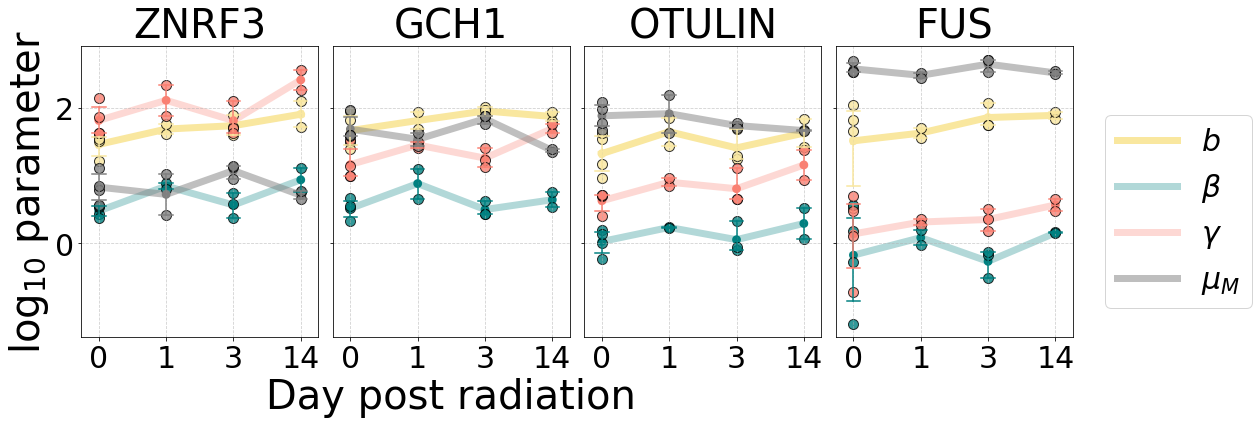

In [2034]:

# List of genes to plot
genes = genes_close_znf3


# Create a single figure with a row of subplots
fig, axes = plt.subplots(1, len(genes), figsize=(18, 6), sharey=True)
alpha = 0.7
for i, g in enumerate(genes):
    ax = axes[i]
    df_gene = df_plot[df_plot.gene_name == g]
    
    # Define palette and plotting parameters
    params = [
        ('log10_b_corrected', '$b$', palette['log10_b_corrected'], 0.3),
        ('log10_beta_corrected', '$\\beta$', palette['log10_beta_corrected'], 0.3),
        ('log10_gamma_corrected', '$\\gamma$', palette['log10_gamma_corrected'], 0.3),
        ('log10_pseudobulk_spliced_norm', '$\\mu_M$', palette['pseudobulk_spliced_norm'], 0.5)
    ]
    
    for param, label, color, alpha in params:
        sns.pointplot(
            data=df_gene,
            x='Day_numeric',
            y=param,
            color=color,
            capsize=0.2,
            errwidth=1.5,
            linewidth=1,
            markers='o',
            linestyles='',
            ax=ax
        )
        ax.scatter(
            x=df_gene['Day_numeric'],
            y=df_gene[param],
            color=color,
            edgecolor='k',
            s=100,
            alpha=0.8
        )
        
        # Calculate and plot means
        day_index = np.array([0, 1, 3, 2])
        means = df_gene.groupby('Day_numeric')[param].mean()[day_index]
        ordered_days = df_gene['Day_numeric'].unique()
        ax.plot(ordered_days, means, color=color, linewidth=7, 
                alpha=alpha if '_b_' not in param else 1.0, label=label,zorder=0)
    
    # Add subplot-specific elements
    ax.set_title(g, fontsize=40)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlabel('', fontsize=30)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_ylabel('')

# Add shared y-axis label
axes[0].set_ylabel('log$_{10}$ parameter', fontsize=40)
axes[1].set_xlabel('Day post radiation', fontsize=40)

# Add a single legend to the right of the row
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=30, loc='center right', bbox_to_anchor=(1., 0.5))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.show()
